In [32]:
import sys
MASK_RCNN_LIB = 'Mask_RCNN/'
sys.path.append(MASK_RCNN_LIB)

from src.config import LookupConfig
from src.data_provider import gen_train_val_datasets
import random
import mrcnn.model as modellib
from pathlib import Path
from mrcnn import visualize
from mrcnn.model import log


LOG_DIR = Path('logging')
TRAIN_SET = Path('data/train/img/')
VAL_SET = Path('data/train/msk')

In [31]:
config = LookupConfig()
_, val_set = gen_train_val_datasets(TRAIN_SET, VAL_SET)
model = modellib.MaskRCNN(mode='inference', config=config, model_dir=str(LOG_DIR))
model.load_weights(str(LOG_DIR / '1' / 'best_model.h5'), by_name=True)

7142it [03:57, 30.12it/s]
/home/tom/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/preprocessing/_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


original_image           shape: (576, 576, 3)         min:    1.00000  max:  255.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max:  576.00000  int64
gt_class_id              shape: (77,)                 min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (77, 4)               min:    0.00000  max:  576.00000  int32
gt_mask                  shape: (576, 576, 77)        min:    0.00000  max:    1.00000  bool


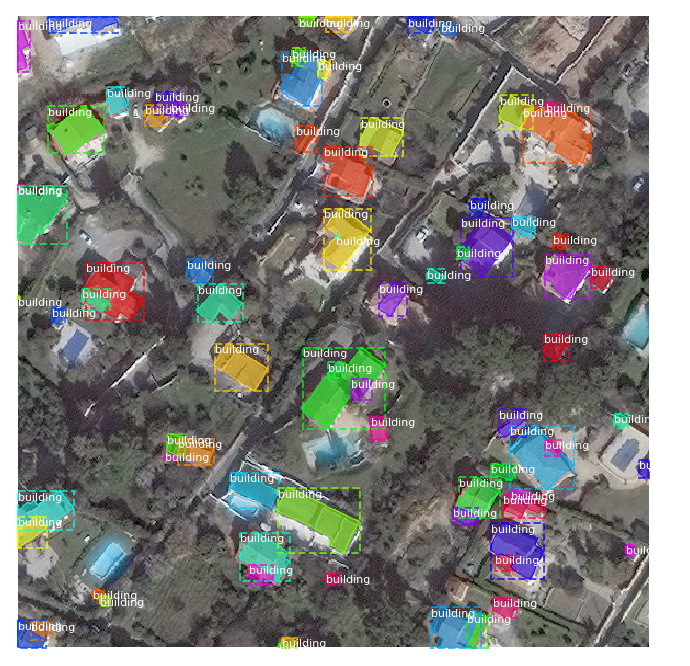

In [42]:
image_id = random.choice(val_set.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(val_set, config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            val_set.class_names, figsize=(12, 12))